In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv',header=0)
df_t = pd.read_csv('test.csv',header=0)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


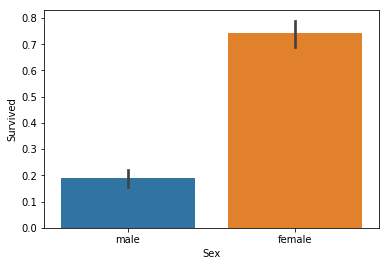

In [5]:
sns.barplot(x="Sex",y="Survived",data=df)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


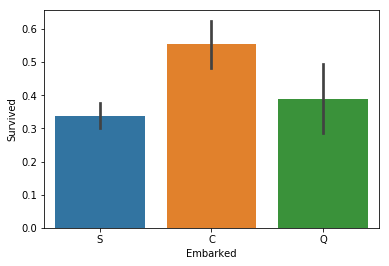

In [6]:
sns.barplot(x="Embarked",y="Survived",data=df)

In [7]:
df["Cabin"]=df["Cabin"].notnull().astype('int')
df_t["Cabin"]=df_t["Cabin"].notnull().astype('int')

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


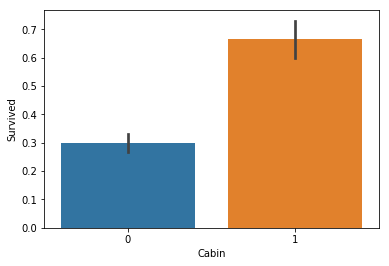

In [8]:
sns.barplot(x="Cabin",y="Survived",data=df)

(array([838.,  33.,  17.,   0.,   3.]),
 array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]),
 <a list of 5 Patch objects>)

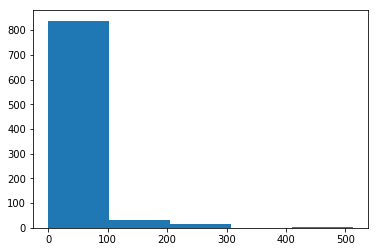

In [9]:
plt.hist(df.Fare,bins = 5)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

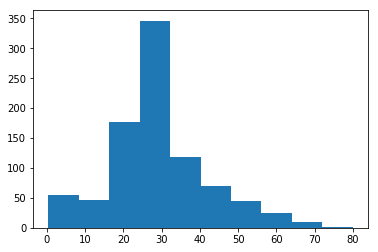

In [10]:
m=df.Age.mean()
df.Age = df.Age.fillna(m)
m1=df_t.Age.mean()
df_t.Age = df_t.Age.fillna(m1)
plt.hist(df['Age'])

In [11]:
def mod_fare(col,cut_points,labels):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin
cut_points = [102,205,307,410]
labels = ['r1','r2','r3','r4','r5']
mode=df.Fare.mode()
df.Fare = df.Fare.fillna(mode[0])
mode1=df_t.Fare.mode()
df_t.Fare = df_t.Fare.fillna(mode1[0])
df['Fare'] = mod_fare(df['Fare'],cut_points,labels)
df_t['Fare'] = mod_fare(df_t['Fare'],cut_points,labels)
points= [8,16,24,32,40,48,56,64,72]
labels1 = ['a0','a1','a2','a3','a4','a5','a6','a7','a8','a9']
df['Age'] = mod_fare(df['Age'],points,labels1)
df_t['Age'] = mod_fare(df_t['Age'],points,labels1)

In [12]:
def mod_names(df):
    df['Nprefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    df['Surname'] = df.Name.apply(lambda x: x.split(' ')[0])
    return df
mod_names(df)
mod_names(df_t)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nprefix,Surname
0,892,3,"Kelly, Mr. James",male,a4,0,0,330911,r1,0,Q,Mr.,"Kelly,"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,a5,1,0,363272,r1,0,S,Mrs.,"Wilkes,"
2,894,2,"Myles, Mr. Thomas Francis",male,a7,0,0,240276,r1,0,Q,Mr.,"Myles,"
3,895,3,"Wirz, Mr. Albert",male,a3,0,0,315154,r1,0,S,Mr.,"Wirz,"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,a2,1,1,3101298,r1,0,S,Mrs.,"Hirvonen,"
5,897,3,"Svensson, Mr. Johan Cervin",male,a1,0,0,7538,r1,0,S,Mr.,"Svensson,"
6,898,3,"Connolly, Miss. Kate",female,a3,0,0,330972,r1,0,Q,Miss.,"Connolly,"
7,899,2,"Caldwell, Mr. Albert Francis",male,a3,1,1,248738,r1,0,S,Mr.,"Caldwell,"
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,a2,0,0,2657,r1,0,C,Mrs.,"Abrahim,"
9,901,3,"Davies, Mr. John Samuel",male,a2,2,0,A/4 48871,r1,0,S,Mr.,"Davies,"


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


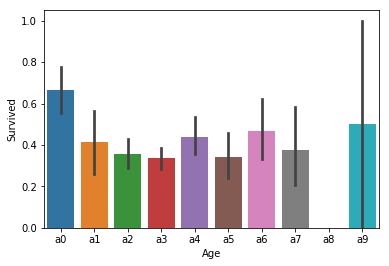

In [13]:
sns.barplot('Age','Survived',data=df)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


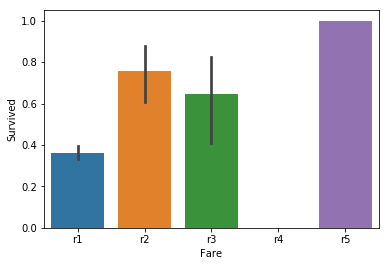

In [14]:
sns.barplot('Fare','Survived',data=df)

In [15]:
df = df.drop(['Name','Ticket','PassengerId'],axis=1)
df_t = df_t.drop(['Name','Ticket','PassengerId'],axis=1)

In [16]:
def modify(df):
    df = pd.get_dummies(df,columns=['Sex'],prefix=['s'])
    df = pd.get_dummies(df,columns=['Pclass'],prefix=['class'])
    s=df['Embarked'].value_counts().index[0]
    df.Embarked=df.Embarked.fillna(s)
    df = pd.get_dummies(df,columns=['Embarked'],prefix=['e'])
    df.Age.replace(['a0','a1','a2','a3','a4','a5','a6','a7','a8','a9'],[0.67,0.40,0.36,0.30,0.43,0.31,0.45,0.38,0.01,0.49],inplace=True)
    df.Fare.replace(['r1','r2','r3','r4','r5'],[0.37,0.72,0.59,0.03,0.95],inplace=True)
    return df

In [17]:
data_train = modify(df)
data_test = modify(df_t)

In [18]:
from sklearn import preprocessing
def encod(df):
    features = ['Surname', 'Nprefix']
    for i in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[i])
        df[i] = le.transform(df[i])

In [19]:
encod(data_train)
encod(data_test)
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null int32
Nprefix     891 non-null int64
Surname     891 non-null int64
s_female    891 non-null uint8
s_male      891 non-null uint8
class_1     891 non-null uint8
class_2     891 non-null uint8
class_3     891 non-null uint8
e_C         891 non-null uint8
e_Q         891 non-null uint8
e_S         891 non-null uint8
dtypes: float64(2), int32(1), int64(5), uint8(8)
memory usage: 59.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null int32
Nprefix     418 non-null int64
Surname     418 non-null int6

In [20]:
y_train = data_train['Survived']
X_train = data_train.drop(['Survived'], axis=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
c = RandomForestClassifier()
c.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
predictions = c.predict(data_test)

In [24]:
df_s = pd.read_csv('gender_submission.csv',header=0)

In [25]:
df_s['Survived']=predictions

In [26]:
df_s.to_csv('result.csv',index = False)